In [1]:
import os
import json
import pyspark

import pandas as pd

sc = pyspark.SparkContext().getOrCreate()

24/12/01 15:11:03 WARN Utils: Your hostname, Walkers-Laptop.local resolves to a loopback address: 127.0.0.1; using 10.0.0.211 instead (on interface en0)
24/12/01 15:11:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/01 15:11:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [15]:
rdd = sc.textFile('./data/Amazon_Fashion.jsonl')
parsed_rdd = rdd.map(lambda line: json.loads(line.strip()))
augmented_rdd = (
    parsed_rdd
    # .filter(lambda record: len(record["title"]) > 0)
    .map(
        lambda record: (
            record["rating"], 
            len(record["title"])
        )
    )
)

In [16]:
augmented_rdd.take(5)

[(5.0, 13), (5.0, 1), (2.0, 9), (1.0, 15), (5.0, 20)]

In [17]:
grouped_rdd = augmented_rdd.groupByKey()
average_rdd = grouped_rdd.mapValues(lambda lengths: sum(lengths) / len(lengths))
result = average_rdd.collect()
print(result)

[(1.0, 21.557613270448336), (2.0, 22.883628691010134), (3.0, 23.503138863653955), (4.0, 22.348151007444788), (5.0, 18.877107948856736)]


In [18]:
df = pd.DataFrame(result, columns=["rating", "average_title_len"])

In [19]:
sc.stop()

<Axes: >

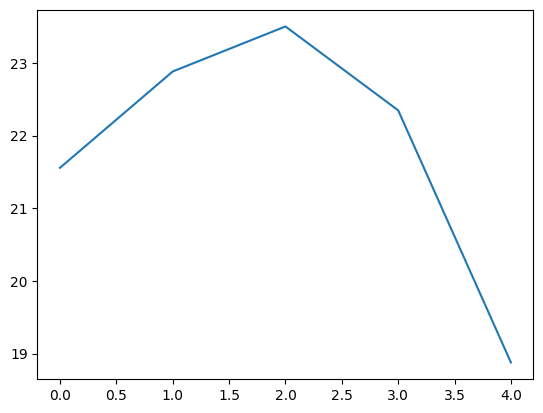

In [20]:
df["average_title_len"].plot()